# An Empirical Comparison of Supervised and Self-Supervised Learning

In [1]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

In [2]:
%load_ext autoreload
%autoreload 2

## Baseline: convolutional neural network

In [3]:
conv_args = TrainArgs(batchsize = 10)

In [4]:
ConvNet, conv_losses = train_ConvNet(conv_args)

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 0, i:   999] avg mini-batch loss: 2.296
[epoch: 0, i:  1499] avg mini-batch loss: 2.282
[epoch: 0, i:  1999] avg mini-batch loss: 2.215
[epoch: 0, i:  2499] avg mini-batch loss: 2.130
[epoch: 0, i:  2999] avg mini-batch loss: 2.068
[epoch: 0, i:  3499] avg mini-batch loss: 2.025
[epoch: 0, i:  3999] avg mini-batch loss: 1.981
[epoch: 0, i:  4499] avg mini-batch loss: 1.925
[epoch: 0, i:  4999] avg mini-batch loss: 1.865
[epoch: 1, i:   499] avg mini-batch loss: 1.787
[epoch: 1, i:   999] avg mini-batch loss: 1.749
[epoch: 1, i:  1499] avg mini-batch loss: 1.708
[epoch: 1, i:  1999] avg mini-batch loss: 1.631
[epoch: 1, i:  2499] avg mini-batch loss: 1.617
[epoch: 1, i:  2999] avg mini-batch loss: 1.578
[epoch: 1, i:  3499] avg mini-batch loss: 1.578
[epoch: 1, i:  3999] avg mini-batch loss: 1.548
[epoch: 1, i:  4499] avg mini-batch loss: 1.520
[epoch: 1, i:  4999] avg mini-batc

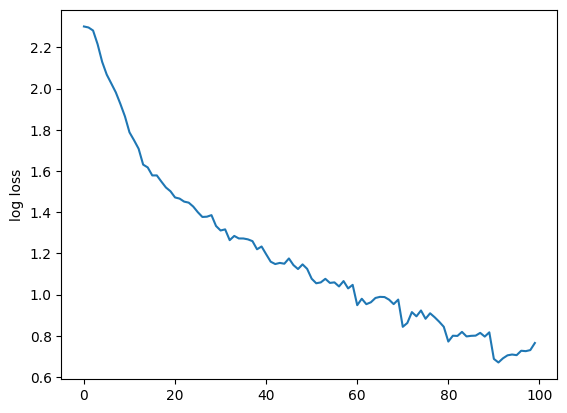

In [5]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [6]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 63.46000000000001 %


## Momentum Contrast

### Pre-Training the Encoder

In [7]:
encoder_args = TrainArgs(epochs = 20)

In [8]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.021174
Train Epoch: 2 	Loss: 0.005386
Train Epoch: 3 	Loss: 0.002669
Train Epoch: 4 	Loss: 0.001904
Train Epoch: 5 	Loss: 0.001582
Train Epoch: 6 	Loss: 0.001387
Train Epoch: 7 	Loss: 0.001267
Train Epoch: 8 	Loss: 0.001168
Train Epoch: 9 	Loss: 0.001083
Train Epoch: 10 	Loss: 0.001040
Train Epoch: 11 	Loss: 0.001000
Train Epoch: 12 	Loss: 0.000940
Train Epoch: 13 	Loss: 0.000922
Train Epoch: 14 	Loss: 0.000890
Train Epoch: 15 	Loss: 0.000845
Train Epoch: 16 	Loss: 0.000833
Train Epoch: 17 	Loss: 0.000802
Train Epoch: 18 	Loss: 0.000781
Train Epoch: 19 	Loss: 0.000739
Train Epoch: 20 	Loss: 0.000745


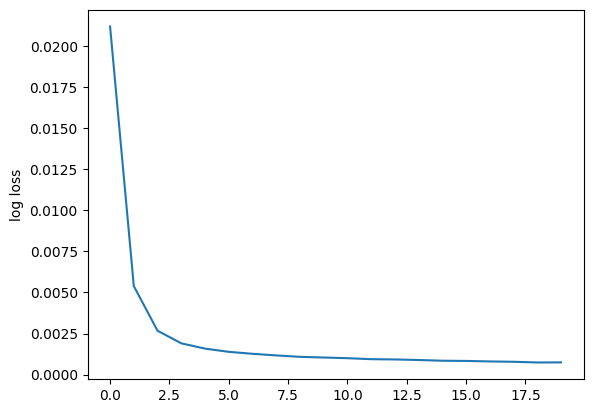

In [9]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [10]:
data, targets = encode_data()

Files already downloaded and verified


100%|██████████| 10000/10000 [01:38<00:00, 101.18it/s]


In [11]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


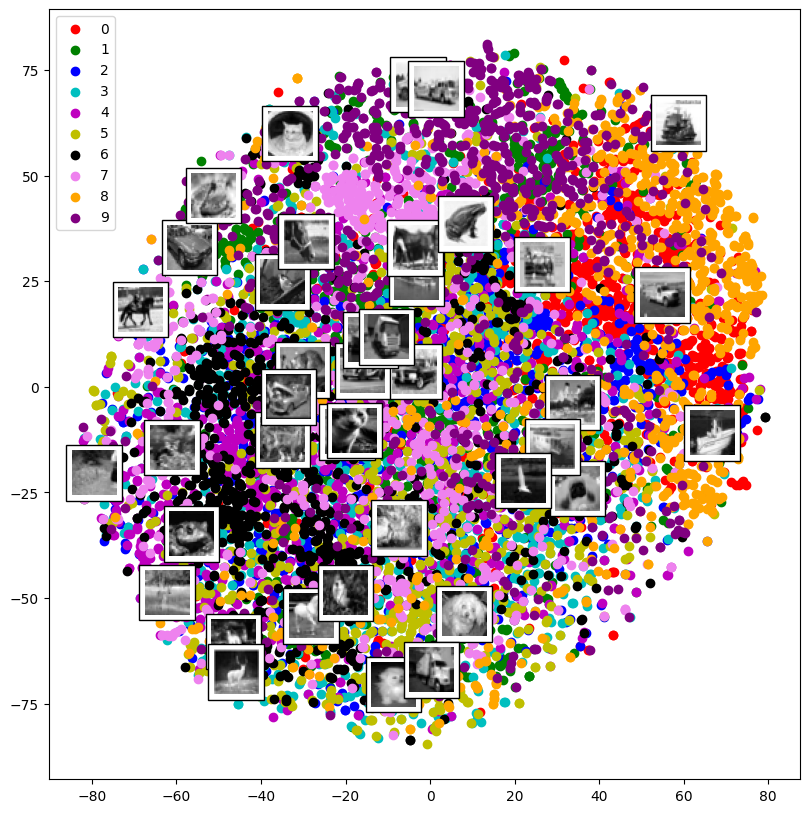

In [12]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [13]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


100%|██████████| 50000/50000 [08:15<00:00, 100.95it/s]


Files already downloaded and verified


100%|██████████| 10000/10000 [01:38<00:00, 101.39it/s]


In [14]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [15]:
svm.score(X_test, y_test)

0.634

### Multiple Runs

In [16]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████| 5000/5000 [00:50<00:00, 99.47it/s] 


Files already downloaded and verified


100%|██████████| 1000/1000 [00:09<00:00, 100.07it/s]


In [17]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [18]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.299
[epoch: 2, i:   499] avg mini-batch loss: 2.292
[epoch: 3, i:   499] avg mini-batch loss: 2.265
[epoch: 4, i:   499] avg mini-batch loss: 2.195
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 1, i:   499] avg mini-batch loss: 2.294
[epoch: 2, i:   499] avg mini-batch loss: 2.271
[epoch: 3, i:   499] avg mini-batch loss: 2.216
[epoch: 4, i:   499] avg mini-batch loss: 2.105
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 1, i:   499] avg mini-batch loss: 2.297
[epoch: 2, i:   499] avg mini-batch loss: 2.274
[epoch: 3, i:   499] avg mini-batch loss: 2.139
[epoch: 4, i:   499] avg mini-batch loss: 2.001
Files already downloaded and verified


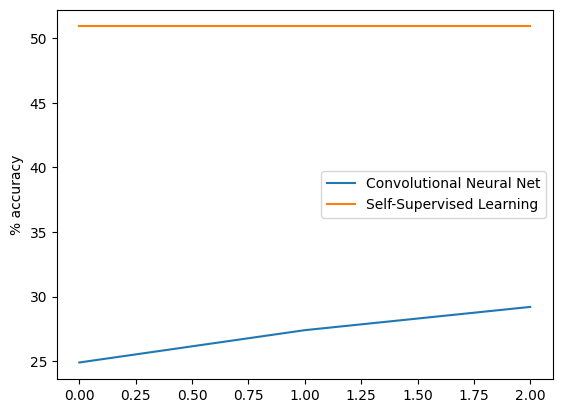

In [19]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [20]:
conv_errors

[24.9, 27.400000000000002, 29.2]

In [21]:
svm_errors

[0.509, 0.509, 0.509]

In [22]:
conv_errors

[24.9, 27.400000000000002, 29.2]